# No-Show Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read CSV file
df = pd.read_csv('noshowappointments.csv')

Check Dataset for any null values. 
So far dataset doesn't have any null values

In [3]:
#check dataset for Nan
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [4]:
#Rename column names to correct typos
df.rename(columns = {'Hipertension' : 'hypertension',
                         'Handcap' : 'handicap',
                         'No-show' : 'no_show'}, inplace=True)

In [5]:
#Convert column names to lowercase for uniformity
df.rename(str.lower, axis='columns', inplace=True)

Male and Female patients with different age groups

Text(0,0.5,'Patient Count')

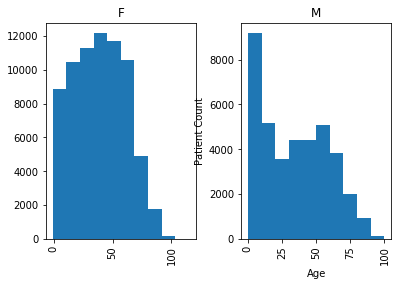

In [6]:
df.hist('age', by='gender')
plt.xlabel('Age')
plt.ylabel('Patient Count')

Average age of Male=38years and Female=33years

Text(0,0.5,'Average Age')

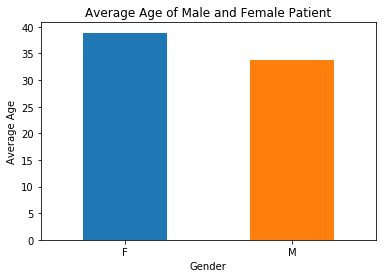

In [7]:
df.groupby('gender').age.mean().plot(kind='bar',title='Average Age of Male and Female Patient',rot=0)
plt.xlabel('Gender')
plt.ylabel('Average Age')

In [8]:
df.groupby('gender').age.mean()

gender
F    38.893987
M    33.736863
Name: age, dtype: float64

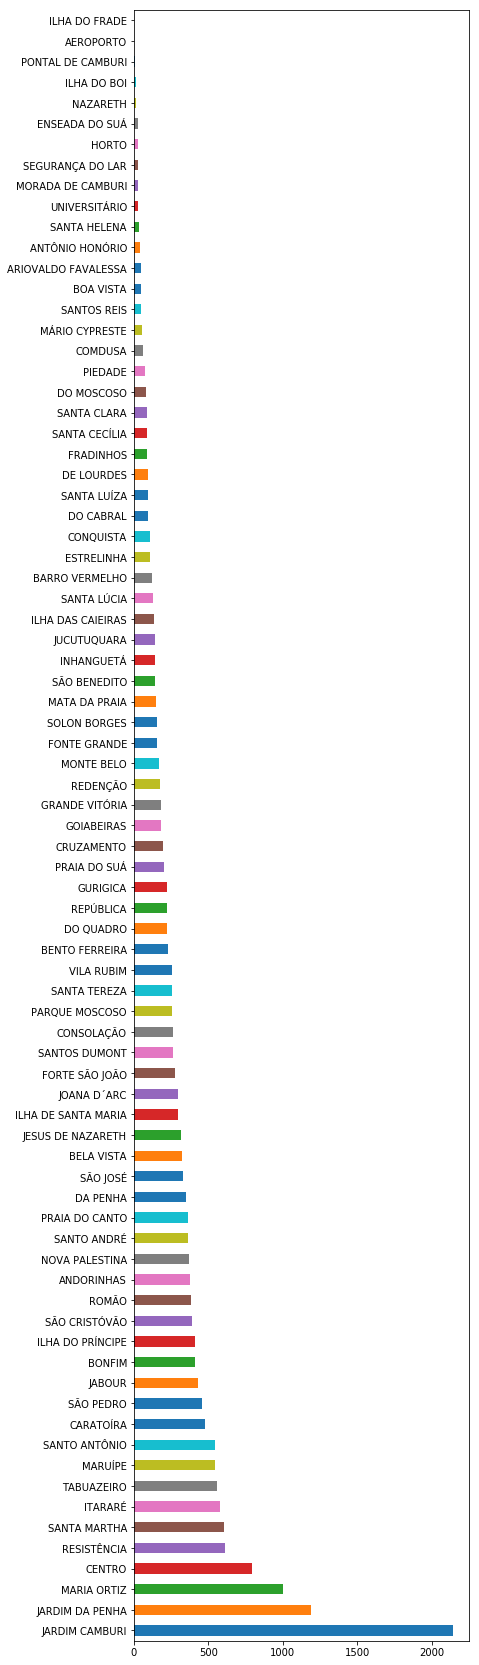

In [9]:
df[df.age >= 60].neighbourhood.value_counts().plot.barh(figsize=(6,30))

Question: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

- Split Dataset on basis of Gender
- Find all how male and female characteristic affect no-show

In [10]:
#Split Dataset on Gender
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']

In [11]:
# split age into groups
def age_bins(col, name):
    age = col
    bins = [0,20,40,60,100]
    age_bin = pd.cut(age, bins, right=False)
    age_count = pd.value_counts(age_bin, sort=False)
    print(age_count)
    age_count.plot.bar(stacked=True,rot=0)
    plt.xlabel("Age Groups")
    plt.ylabel('Patients Count')
    plt.title("{} patients count in age groups".format(name))
    plt.show()

It looks Male patients with age group of 0-20 years are maximum

[0, 20)      14334
[20, 40)      7973
[40, 60)      9494
[60, 100)     6884
Name: age, dtype: int64


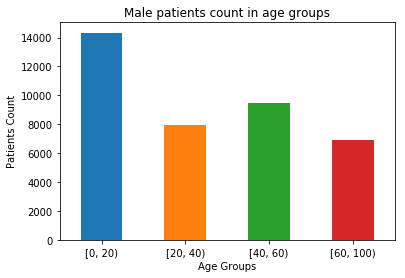

In [12]:
# Male
age_bins(male_df['age'], 'Male')

Male Patients age more than equal 60 year stay in which neighbourhood?

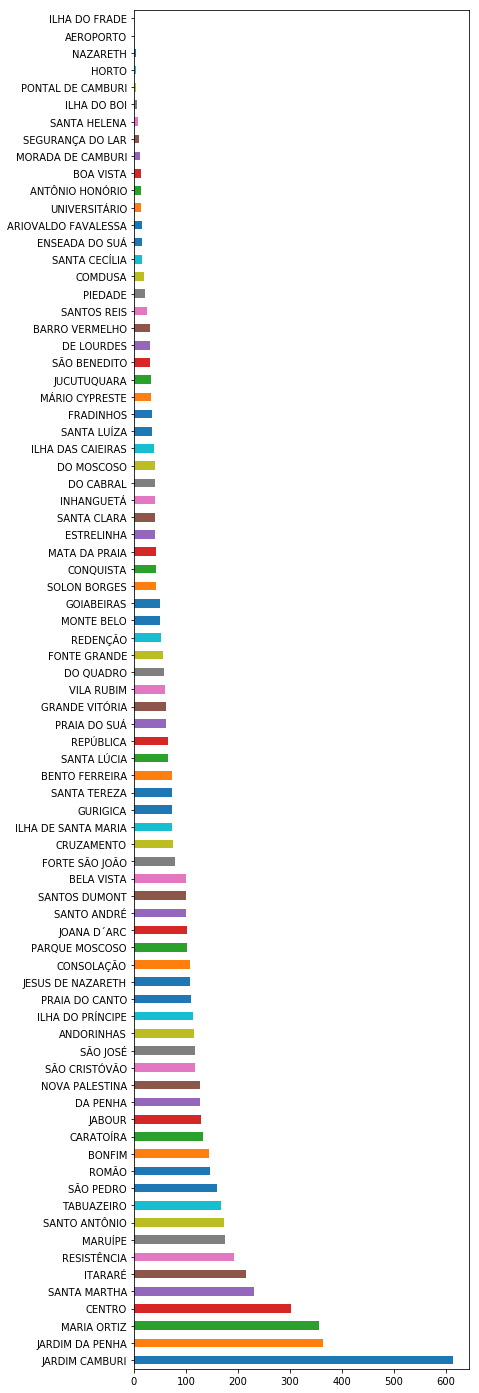

In [13]:
male_df[male_df.age >= 60].neighbourhood.value_counts().plot.barh(figsize=(6,25),y='neighbourhood',rot=0)

Female patient age more than equal 60 years stay in which neighbourhood?

- It looks male and female has common neighbourhood where patients of age 60> stay. 

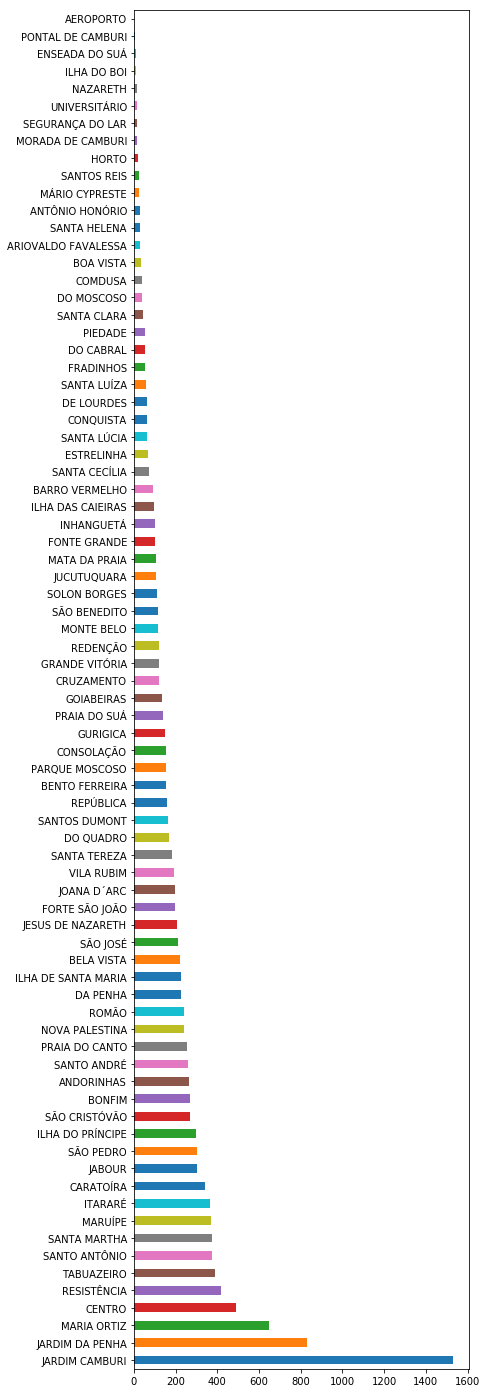

In [14]:
female_df[female_df.age >= 60].neighbourhood.value_counts().plot.barh(label='Neighbourhood',figsize=(6,25),y='neighbourhood',rot=0)

Female Patients in Between age group of 20-60 are maximum`

[0, 20)      16077
[20, 40)     20897
[40, 60)     20578
[60, 100)    14278
Name: age, dtype: int64


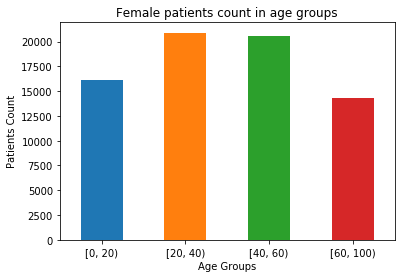

In [15]:
# Female
age_bins(female_df['age'],'Female')

Male & Female Patients with different characteristic show up for appointment

In [16]:
#Hypertension
hm = male_df[(male_df['hypertension'] > 0) & (male_df['no_show'] == 'No')]
hf = female_df[(female_df['hypertension'] > 0) & (female_df['no_show'] == 'No')]

#Diabetes
dm = male_df[(male_df['diabetes'] > 0) & (male_df['no_show'] == 'No')]
df = female_df[(female_df['diabetes'] > 0) & (female_df['no_show'] == 'No')]

#Alcoholism
am = male_df[(male_df['alcoholism'] > 0) & (male_df['no_show'] == 'No')]
af = female_df[(female_df['alcoholism'] > 0) & (female_df['no_show'] == 'No')]

#handicap
hcm = male_df[(male_df['handicap'] > 0) & (male_df['no_show'] == 'No')]
hcf = female_df[(female_df['handicap'] > 0) & (female_df['no_show'] == 'No')]

#Hypertension, Diabetes, Alcoholism
hdam = male_df[(male_df['hypertension'] > 0) & (male_df['no_show'] == 'No') & (male_df['diabetes'] > 0) & (male_df['alcoholism'] > 0)]
hdaf = female_df[(female_df['hypertension'] > 0) & (female_df['no_show'] == 'No') & (female_df['diabetes'] > 0) & (female_df['alcoholism'] > 0)]

## Male
Average age of a male patient with hypertension is 61 years and max of them fall into age group between 60-100years who showed up for appointment

MALE
[0, 20)        14
[20, 40)      360
[40, 60)     2014
[60, 100)    2959
Name: age, dtype: int64


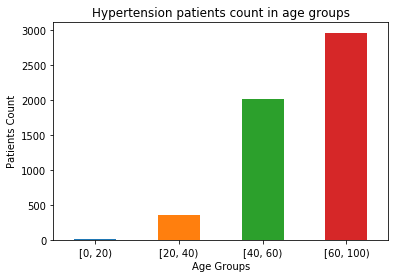

('Average age with hypertension ', 61.111651393304655)


In [17]:
#male with hypertension
print('MALE')
age_bins(hm['age'], 'Hypertension')
print('Average age with hypertension ',hm['age'].mean())

Average age of a male patient with Diabetes is 61 years and max of them fall into age group between 60-100years who showed up for appointment

[0, 20)         9
[20, 40)       79
[40, 60)      711
[60, 100)    1125
Name: age, dtype: int64


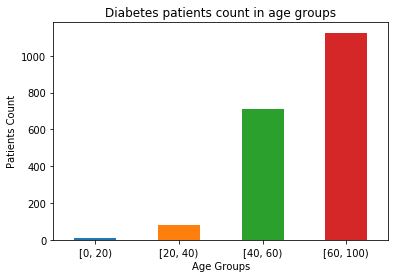

('Average age with diabetes ', 61.63513513513514)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ff6c350>]],
      dtype=object)

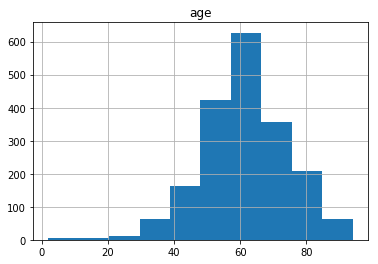

In [18]:
#male with diabetes
age_bins(dm['age'],'Diabetes')
print('Average age with diabetes ',dm['age'].mean())
dm.hist('age')


Average age of a male patient with Alcoholism is 52 years and max of them fall into age group between 40-60years who showed up for appointment

[0, 20)        10
[20, 40)      217
[40, 60)     1008
[60, 100)     533
Name: age, dtype: int64


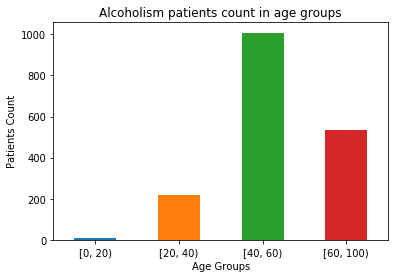

('Average age with alcoholism ', 52.60803167420814)


In [19]:
#male with alcoholism
age_bins(am['age'],'Alcoholism')
print('Average age with alcoholism ',am['age'].mean())

Average age of a male patient with hypertension, diabetes, Alcoholism is 61 years and max of them fall into age group between 60-100years who showed up for appointment

[0, 20)       0
[20, 40)      3
[40, 60)     50
[60, 100)    84
Name: age, dtype: int64


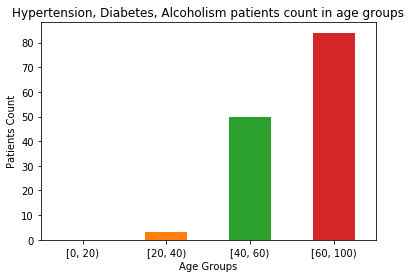

('Average age with hypertension, diabetes, alcoholism ', 61.53284671532847)


In [20]:
#male with hypertension, diabetes, alcoholism
age_bins(hdam['age'],'Hypertension, Diabetes, Alcoholism')
print('Average age with hypertension, diabetes, alcoholism ',hdam['age'].mean())

[0, 20)       94
[20, 40)     188
[40, 60)     229
[60, 100)    274
Name: age, dtype: int64


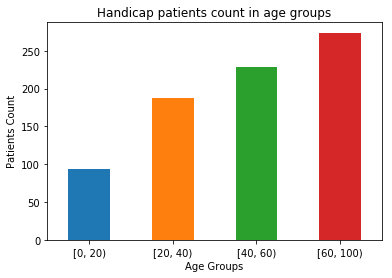

('Average age with handicap ', 49.287166454891995)


In [21]:
#male with handicap
age_bins(hcm['age'], 'Handicap')
print('Average age with handicap ',hcm['age'].mean())

## Female
Average age of a Female patient with hypertension is 60 years and max of them fall into age group between 60-100years who showed up for appointment

[0, 20)        16
[20, 40)      883
[40, 60)     5002
[60, 100)    6780
Name: age, dtype: int64


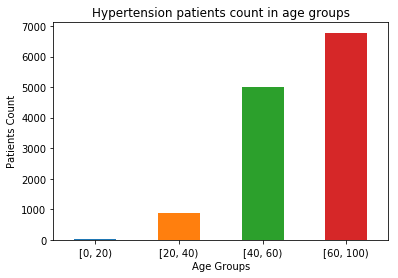

('Average age with hypertension ', 60.66905850812175)


In [22]:
#Female with hypertension
age_bins(hf['age'],'Hypertension')
print('Average age with hypertension ',hf['age'].mean())

Average age of a Female patient with Diabetes is 61 years and max of them fall into age group between 60-100years who showed up for appointment

[0, 20)        31
[20, 40)      277
[40, 60)     1557
[60, 100)    2724
Name: age, dtype: int64


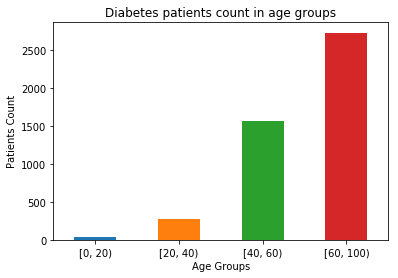

('Average age with diabetes ', 61.67008062758771)


In [23]:
#Female with Diabetes
age_bins(df['age'],'Diabetes')
print('Average age with diabetes ',df['age'].mean())

Average age of a Female patient with Alcoholism is 45 years and max of them fall into age group between 40-60years who showed up for appointment

[0, 20)        8
[20, 40)     267
[40, 60)     507
[60, 100)    133
Name: age, dtype: int64


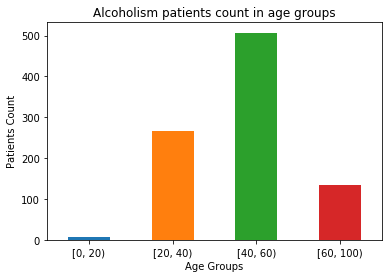

('Average age with Alcoholism ', 45.89617486338798)


In [24]:
#Female with Alcoholism
age_bins(af['age'],'Alcoholism')
print('Average age with Alcoholism ',af['age'].mean())

Average age of a Female patient with hypertension, diabetes, alcoholism is 55 years and max of them fall into age group between 40-60years who showed up for appointment

[0, 20)       0
[20, 40)      8
[40, 60)     44
[60, 100)    21
Name: age, dtype: int64


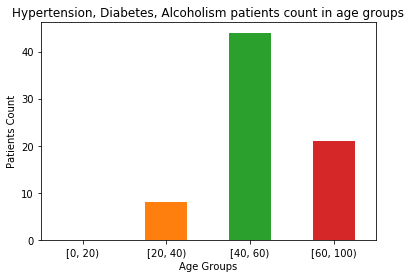

('Average age with hypertension, diabetes, alcoholism ', 55.75342465753425)


In [25]:
#Female with Hypertension, diabetes, alcoholism
age_bins(hdaf['age'],'Hypertension, Diabetes, Alcoholism')
print('Average age with hypertension, diabetes, alcoholism ',hdaf['age'].mean())

[0, 20)      120
[20, 40)     188
[40, 60)     310
[60, 100)    428
Name: age, dtype: int64


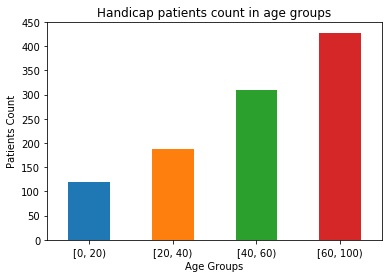

('Average age with Handicap ', 52.58166189111748)


In [26]:
#Female with Handicap
age_bins(hcf['age'], 'Handicap')
print('Average age with Handicap ',hcf['age'].mean())

1. BOTH MALE AND FEMALE PATIENTS AGES IN BETWEEN 40-60 YEARS WITH ALCOHOLISM SHOW UP FOR APPOINTMENT.
2. BOTH MALE AND FEMALE PATIENTS WITH HYPERTENSION AGES IN BETWEEN 60-100 YEARS SHOW UP FOR APPOINTMENT.
3. FEMALE PATIENTS WITH DIABETES AGES IN BETWEEN 40-60 YEARS SHOW UP APPOINTMENT.
4. BOTH MALE AND FEMALE WITH ALCOHOLISM, HYPERTENSION, DIABETES ARE MORE LIKELY TO SHOW UP FOR APPOINTMENT IN AGE GROUP BETWEEN 60-100YEARS.

# Patients without any characteristics (NO HEALTH ISSUE) who showed up for appointment

In [27]:
#Hypertension
hm_0 = male_df[(male_df['hypertension'] == 0) & (male_df['no_show'] == 'No')]
hf_0 = female_df[(female_df['hypertension'] == 0) & (female_df['no_show'] == 'No')]

#Diabetes
dm_0 = male_df[(male_df['diabetes'] == 0) & (male_df['no_show'] == 'No')]
df_0 = female_df[(female_df['diabetes'] == 0) & (female_df['no_show'] == 'No')]

#Alcoholism
am_0 = male_df[(male_df['alcoholism'] == 0) & (male_df['no_show'] == 'No')]
af_0 = female_df[(female_df['alcoholism'] == 0) & (female_df['no_show'] == 'No')]

#handicap
hcm_0 = male_df[(male_df['handicap'] == 0) & (male_df['no_show'] == 'No')]
hcf_0 = female_df[(female_df['handicap'] == 0) & (female_df['no_show'] == 'No')]

#Hypertension, Diabetes, Alcoholism, handicap
hdam_0 = male_df[(male_df['hypertension'] == 0) & (male_df['no_show'] == 'No') 
                 & (male_df['diabetes'] == 0) & (male_df['alcoholism'] == 0) 
                 & (male_df['handicap'] == 0) & (male_df['scholarship'] == 0)]
hdaf_0 = female_df[(female_df['hypertension'] == 0) & (female_df['no_show'] == 'No') 
                   & (female_df['diabetes'] == 0) & (female_df['alcoholism'] == 0)
                   & (female_df['handicap'] == 0) & (female_df['scholarship'] == 0)]

Male patient in between 0-20 years with no health issue and no scholarship show up for the apointment. From the above analysis with Patient with one or more charactertics of age group between 0-20years are negliable.
- Average age of a male patient with no health issue is 28 years who show up for appointment.

[0, 20)      10014
[20, 40)      5276
[40, 60)      4705
[60, 100)     2441
Name: age, dtype: int64


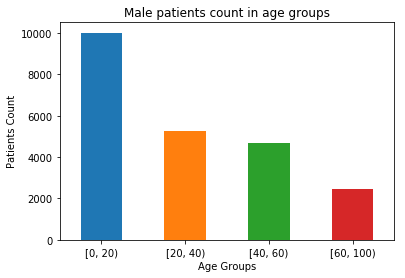

('Average Age', 28.093688714565875)


In [28]:
age_bins(hdam_0['age'],'Male')
print('Average Age',hdam_0['age'].mean())

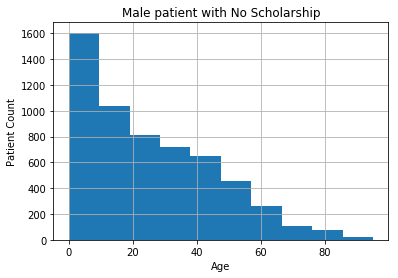

In [29]:
y_hdam = male_df[(male_df['hypertension'] == 0) & (male_df['no_show'] == 'Yes') 
                 & (male_df['diabetes'] == 0) & (male_df['alcoholism'] == 0) 
                 & (male_df['handicap'] == 0) & (male_df['scholarship'] == 0)]
# age_bins(y_hdam['age'])
y_hdam.hist('age')
plt.xlabel('Age')
plt.ylabel('Patient Count')
plt.title('Male patient with No Scholarship')
plt.show()

On Average Female patients with no health issues age around 33 shows up for the appointment

[0, 20)      10860
[20, 40)     12146
[40, 60)      9920
[60, 100)     4781
Name: age, dtype: int64


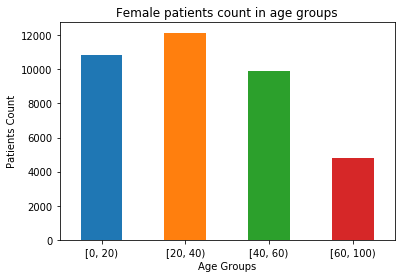

('Average Age', 33.690894145099705)


In [30]:
age_bins(hdaf_0['age'],'Female')
print('Average Age',hdaf_0['age'].mean())

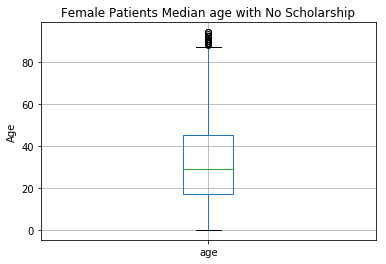

In [31]:
y_hdaf = female_df[(female_df['hypertension'] == 0) & (female_df['no_show'] == 'Yes') 
                 & (female_df['diabetes'] == 0) & (female_df['alcoholism'] == 0) 
                 & (female_df['handicap'] == 0) & (female_df['scholarship'] == 0)]
# age_bins(y_hdaf['age'])
y_hdaf.boxplot('age')
plt.ylabel('Age')
plt.title('Female Patients Median age with No Scholarship')
plt.show()

Patients with Scholarship

In [32]:
#Hypertension, Diabetes, Alcoholism, handicap
hdam_0 = male_df[(male_df['hypertension'] == 0) & (male_df['no_show'] == 'No') 
                 & (male_df['diabetes'] == 0) & (male_df['alcoholism'] == 0) 
                 & (male_df['handicap'] == 0) & (male_df['scholarship'] == 1)]
hdaf_0 = female_df[(female_df['hypertension'] == 0) & (female_df['no_show'] == 'No') 
                   & (female_df['diabetes'] == 0) & (female_df['alcoholism'] == 0)
                   & (female_df['handicap'] == 0) & (female_df['scholarship'] == 1)]

[0, 20)      1045
[20, 40)      113
[40, 60)      130
[60, 100)      17
Name: age, dtype: int64


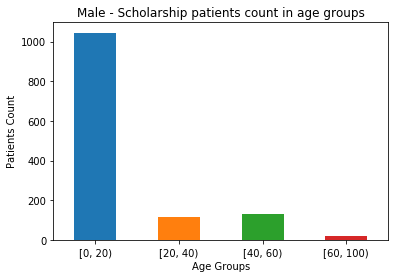

In [33]:
age_bins(hdam_0['age'],'Male - Scholarship')

[0, 20)      1457
[20, 40)     2516
[40, 60)      970
[60, 100)     116
Name: age, dtype: int64


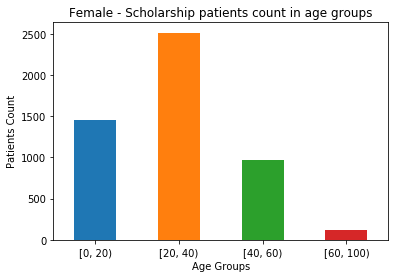

In [34]:
age_bins(hdaf_0['age'],'Female - Scholarship')

- Challenges I faced personally were to understand the relationship between the characteristics. 
- I thought spliting data on gender basis could be more useful to find differences between male and female patients. 
- Handicap column has more than 0,1 values such as 2,3. Which is unneccessary. I personally don't think handicap will effect the person to show up for appointment. Handicap person also can be health as normal humans. 

It clear that patient with scholarship are very few and scholarship doesn't affect patient to show up for appointment.

- Hypertension, Diabetes, Alcoholism effects patients with average age above 60years for male and 55years for female and they show up for appointment. 

- Patient with no health issue shows up for appointment average age of male is 28 and 33 for female.

- Scholarship doesn't affect patient to show up for appointment. Average age of a person having scholarship are in between 25-30

- Overall Clearly Age and Characteristics are the factors important and key to predicit if patient shows up for the appointment or No-show. 